<a href="https://colab.research.google.com/github/HyoJuJang/traffic/blob/master/read_pickles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASELINE

### 코드 설명
- 1) 하단의 코드를 통해 전처리 진행
    - (1) 이미지와 json 파일을 불러와
    - (2) BoundingBox를 기준으로 이미지를 Crop
    - (3) 새로운 폴더에 이미지 파일을 저장
- 2) 모델링 부분부터 재시작
    - (1) 새롭게 저장한 데이터를 train_images와 targets에 저장
    - (2) VGG16 모델에 적용
    - (3) test 데이터는 폴더 단위로 불러와 예측값의 평균 적용
    - (4) 저장 후 제출

### Library

In [1]:
# 데이터 보기
import pandas as pd
import numpy as np
from glob import glob

# 이미지데이터 로딩
from PIL import Image
import cv2
from tqdm import tqdm


# 파일경로 설정
import os
import json

# Others
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/2021_2/dacon/go_traffic_file'


train_path = data_path + '/train'
#test_path = data_path + '/test'

new_image_directory = data_path + '/new_images'
new_train_image_directory = new_image_directory + '/train'
#new_test_image_directory = new_image_directory + '/test'

action_information = pd.read_csv(data_path + '/action_information.csv')
#sample_submission = pd.read_csv(data_path + '/sample_submission.csv')

classes = pd.get_dummies(action_information[['Label']], columns = ['Label']).to_numpy()

In [4]:
def make_new_dir(path) : 
    if os.path.isdir(path) == False:
        os.makedirs(path)

# Restart & Modeling

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
# Modeling
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications import VGG16 # 모델은 가벼운 모델을 사용합니다.
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [6]:
# GPU 환경 설정
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [7]:
new_train_image_directories = sorted(glob(new_train_image_directory + '/*'), key = lambda x : int(x.split('/')[-1].split('_')[-1]))

In [8]:
train_answer = []
train_image_directories = sorted(glob(train_path + '/*'), key = lambda x : int(x.split('_')[-1]))
for train_image_directory in train_image_directories:
  json_path = glob(train_image_directory + '/*.json')[0]
  js = json.load(open(json_path))
  action = js.get('action')
  train_answer.append(action)

In [9]:
len(new_train_image_directories), len(train_answer)

(142, 142)

In [10]:
# 33번 file이 잘못 annotation 되었다고 함
train_answer[33] = 5
train_answer[30:35]

[1, 5, 5, 5, 5]

In [ ]:
new_train_image_directories = new_train_image_directories[41:51]
train_answer = train_answer[41:51]
new_train_image_directories

['/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_41',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_42',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_43',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_44',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_45',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_46',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_47',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_48',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_49',
 '/content/drive/MyDrive/2021_2/dacon/go_traffic_file/new_images/train/file_50']

In [ ]:
tf.config.set_soft_device_placement(True)
images = []
targets = []
stratify = []
for num, (new_train_image_directory, action) in tqdm(enumerate(zip(new_train_image_directories, train_answer)), total = len(new_train_image_directories)) : 
    image_paths = sorted(glob(new_train_image_directory + '/*'), key = lambda x : int(x.split('/')[-1].replace('.jpg','')))
    image_len = len(image_paths)
    for image_path in image_paths : 
        img = image.load_img(image_path, target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        images.append(img)
        targets.append(classes[action])
        stratify.append(action)

images = np.array(images)
targets = np.array(targets)

 50%|█████     | 5/10 [06:15<06:19, 75.99s/it]

In [ ]:
import pickle

In [ ]:
# pickle 쓰기 ###### 주의 : 덮어쓰여짐 ######
#with open ("/content/drive/MyDrive/2021_2/dacon/go_traffic_file/train_img_41_50", "wb") as file:
  #pickle.dump(images, file)

#with open ("/content/drive/MyDrive/2021_2/dacon/go_traffic_file/train_tar_41_50", "wb") as file:
  #pickle.dump(targets, file)

#with open ("/content/drive/MyDrive/2021_2/dacon/go_traffic_file/train_stratify_41_50", "wb") as file:
  #pickle.dump(stratify, file)

In [ ]:
images.shape

(6244, 224, 224, 3)

In [ ]:
# pickle 읽기
with open("/content/drive/MyDrive/2021_2/dacon/go_traffic_file/array_img_41", "rb") as file:
    images = pickle.load(file)
with open("/content/drive/MyDrive/2021_2/dacon/go_traffic_file/array_tar_41", "rb" ) as file:
    targets = pickle.load(file)

In [ ]:
print(images.shape)
print(targets.shape)

(6244, 224, 224, 3)
(6244, 6)


In [ ]:
temp = [images, images]
new = np.concatenate(temp, axis=0)

In [ ]:
new.shape

(12488, 224, 224, 3)

In [ ]:
train_idx, valid_idx = train_test_split(range(images.shape[0]), test_size = 0.2, stratify = stratify)

X_train = images[train_idx]
y_train = targets[train_idx]

X_valid = images[valid_idx]
y_valid = targets[valid_idx]

print('X_train shape : ', X_train.shape)
print('X_valid shape : ', X_valid.shape)
print('y_train shape : ', y_train.shape)
print('y_valid shape : ', y_valid.shape)

NameError: ignored

In [ ]:
baseModel = VGG16(input_shape = (224,224,3), weights='imagenet', include_top=False, )
baseModel.trainable = False

model_in = Input(shape = (224,224,3))
base_model = baseModel(model_in)
head_model = MaxPooling2D(pool_size=(7, 7))(base_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(256, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(32, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(8, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)

model_out = Dense(classes.shape[1], activation="softmax")(head_model)

model = Model(inputs=model_in, outputs=model_out)

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf

In [ ]:
tf.config.set_soft_device_placement(True)
tf.test.gpu_device_name()

''

In [ ]:
tf.config.set_soft_device_placement(True)
history = model.fit(
            X_train, y_train, 
            validation_data = (X_valid,y_valid),
            verbose = 1,
            batch_size = 300,
            epochs=20,
                   )

Epoch 1/20


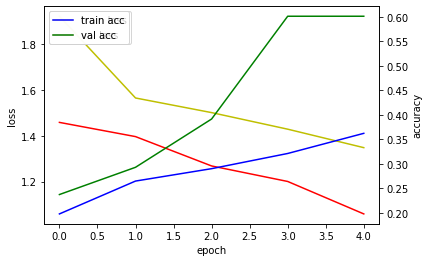

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
new_test_image_directory = new_image_directory + '/test'
new_test_image_directories = sorted(glob(new_test_image_directory + '/*'), key = lambda x : int(x.split('file_')[-1]))

predictions = []
for new_test_image_directory in tqdm(new_test_image_directories, total = len(new_test_image_directories)) :
    image_paths = sorted(glob(new_test_image_directory + '/*.jpg'), key = lambda x : int(x.split('/')[-1].replace('.jpg','')))
    image_len = len(image_paths)
    test_images  = []
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        test_images.append(img)
    prediction = np.mean(model.predict(np.array(test_images)), axis = 0)
    predictions.append(prediction)

0it [00:00, ?it/s]


In [ ]:
predictions

[]

혹시 몰라서 copy

In [ ]:
print(images.shape)
print(targets.shape)

(22218, 224, 224, 3)
(22218, 6)


In [ ]:
train_idx, valid_idx = train_test_split(range(images.shape[0]), test_size = 0.2, stratify = stratify)

X_train = images[train_idx]
y_train = targets[train_idx]

X_valid = images[valid_idx]
y_valid = targets[valid_idx]

print('X_train shape : ', X_train.shape)
print('X_valid shape : ', X_valid.shape)
print('y_train shape : ', y_train.shape)
print('y_valid shape : ', y_valid.shape)

X_train shape :  (17774, 224, 224, 3)
X_valid shape :  (4444, 224, 224, 3)
y_train shape :  (17774, 6)
y_valid shape :  (4444, 6)


In [ ]:
baseModel = VGG16(input_shape = (224,224,3), weights='imagenet', include_top=False, )
baseModel.trainable = False

model_in = Input(shape = (224,224,3))
base_model = baseModel(model_in)
head_model = MaxPooling2D(pool_size=(7, 7))(base_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(256, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(32, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(8, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)

model_out = Dense(classes.shape[1], activation="softmax")(head_model)

model = Model(inputs=model_in, outputs=model_out)

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(
            X_train, y_train, 
            validation_data = (X_valid,y_valid),
            verbose = 1,
            batch_size = 512,
            epochs=20,
                   )

Epoch 1/20
35/35 [==============================] - 21s 585ms/step - loss: 1.8091 - accuracy: 0.1786 - val_loss: 1.7915 - val_accuracy: 0.1791
Epoch 2/20
35/35 [==============================] - 20s 572ms/step - loss: 1.7842 - accuracy: 0.1962 - val_loss: 1.7554 - val_accuracy: 0.2565
Epoch 3/20
35/35 [==============================] - 20s 577ms/step - loss: 1.7489 - accuracy: 0.2432 - val_loss: 1.6933 - val_accuracy: 0.3510
Epoch 4/20
35/35 [==============================] - 20s 573ms/step - loss: 1.6501 - accuracy: 0.3006 - val_loss: 1.5116 - val_accuracy: 0.4370
Epoch 5/20
35/35 [==============================] - 20s 573ms/step - loss: 1.4607 - accuracy: 0.4221 - val_loss: 1.1799 - val_accuracy: 0.6503
Epoch 6/20
35/35 [==============================] - 20s 573ms/step - loss: 1.2116 - accuracy: 0.5340 - val_loss: 0.8793 - val_accuracy: 0.7538
Epoch 7/20
35/35 [==============================] - 20s 575ms/step - loss: 1.0142 - accuracy: 0.6247 - val_loss: 0.6756 - val_accuracy: 0.8141

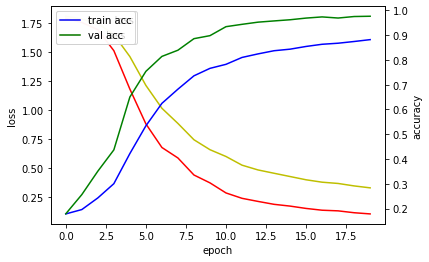

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
new_test_image_directory = new_image_directory + '/test'
new_test_image_directories = sorted(glob(new_test_image_directory + '/*'), key = lambda x : int(x.split('file_')[-1]))

predictions = []
for new_test_image_directory in tqdm(new_test_image_directories, total = len(new_test_image_directories)) :
    image_paths = sorted(glob(new_test_image_directory + '/*.jpg'), key = lambda x : int(x.split('/')[-1].replace('.jpg','')))
    image_len = len(image_paths)
    test_images  = []
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        test_images.append(img)
    prediction = np.mean(model.predict(np.array(test_images)), axis = 0)
    predictions.append(prediction)

100%|██████████| 45/45 [00:15<00:00,  2.99it/s]


In [ ]:
sample_submission.iloc[:,1:] = predictions
display(sample_submission.head())
sample_submission.to_csv('./BASELINE.csv', index=False)

,file_path,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5
0,./test\file_142,0.048860,0.029996,0.253161,0.269593,0.033256,0.365135
1,./test\file_143,0.004876,0.003066,0.098355,0.130929,0.034184,0.728591
2,./test\file_144,0.036387,0.005520,0.043648,0.833246,0.010118,0.071081
3,./test\file_145,0.012213,0.015196,0.609207,0.054274,0.015465,0.293646
4,./test\file_146,0.861626,0.011323,0.014597,0.024359,0.059995,0.028100
